In [1]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import os
import joblib
dataset_path = 'mnist_784.pkl'

# Function to fetch and save the dataset
def fetch_and_cache_mnist(dataset_path):
    if os.path.exists(dataset_path):
        # Load the dataset from the file
        mnist = joblib.load(dataset_path)
        print("Loaded dataset from cache.")
    else:
        # Fetch the dataset from the server
        mnist = fetch_openml('mnist_784', version=1, as_frame=False)
        # Save the dataset to the file
        joblib.dump(mnist, dataset_path)
        print("Fetched and cached the dataset.")
    return mnist

# Fetch and cache the dataset
mnist = fetch_and_cache_mnist(dataset_path)

# Use the dataset
X, y = mnist.data, mnist.target
from sklearn.utils import resample
X_sample, y_sample = resample(X, y, n_samples=2000, random_state=42, stratify=y)

Loaded dataset from cache.


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

In [5]:
def plot_umap(n_neighbors, min_dist):
    reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=n_neighbors,
        min_dist=min_dist)
    X_umap = reducer.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    colors = plt.get_cmap('tab10')
    for class_value in np.unique(y_sample):
        indices = np.where(y_sample == class_value)
        plt.scatter(X_umap[indices, 0], X_umap[indices, 1], label=str(class_value), s=5)
    plt.title(f'UMAP Projection with n_neighbors={n_neighbors}, min_dist={min_dist}')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(markerscale=2)
    plt.show()


# UMAP
- [src](https://pair-code.github.io/understanding-umap/)
UMAP constructs a high dimensional graph representation of the data then optimizes a low-dimensional graph to be as structurally similar as possible. 

In order to construct the initial high-dimensional graph, UMAP builds a weighted graph, with edge weights representing the likelihood that two points are connected. To determine connectedness, UMAP extends a radius outwards from each point, connecting points when those radii overlap. Choosing this radius is critical - too small a choice will lead to small, isolated clusters, while too large a choice will connect everything together. UMAP overcomes this challenge by choosing a radius locally, based on the distance to each point's nth nearest neighbor. UMAP then makes the graph "fuzzy" by decreasing the likelihood of connection as the radius grows.

## UMAP Hyperparameters
### n_neighbors 
The number of approximate nearest neighbors used to construct the initial high-dimensional graph. 

It effectively controls how UMAP balances local versus global structure - low values will push UMAP to focus more on local structure by constraining the number of neighboring points considered when analyzing the data in high dimensions, while high values will push UMAP towards representing the big-picture structure while losing fine detail.

### min_dist
The minimum distance between points in low-dimensional space. This parameter controls how tightly UMAP clumps points together, with low values leading to more tightly packed embeddings. Larger values of min_dist will make UMAP pack points together more loosely. 

## UMAP vs t-SNE
For lower values of the perplexity parameter, t-SNE tends to "spread out" the projected data with very little preservation of the global structure. In contrast, UMAP tends to group adjacent pieces of the higher-dimensional structure together in low dimensions, which reflects an increased preservation of global structure. Note that, using t-SNE, it takes an extremely high perplexity (~1000) to begin to see the global structure emerge, and at such large perplexity values the time to compute is dramatically longer. It's also notable that t-SNE projections vary widely from run to run, with different pieces of the higher-dimensional data projected to different locations. While UMAP is also a stochastic algorithm, it's striking how similar the resulting projections are from run to run and with different parameters. This is due, again, to UMAP's increased emphasis on global structure in comparison to t-SNE.


/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 216 with accuracies 
[4.06430737e-06 5.19472155e-06 7.35234684e-05 8.27078000e-05]
not reaching the requested tolerance 5.513429641723633e-06.
Use iteration 216 instead with accuracy 
4.1372574328188783e-05.

  _, diffusion_map = lobpcg(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[4.06430746e-06 5.19472148e-06 7.35234684e-05 8.27078000e-05]
not reaching the requested tolerance 5.513429641723633e-06.
  _, diffusion_map = lobpcg(


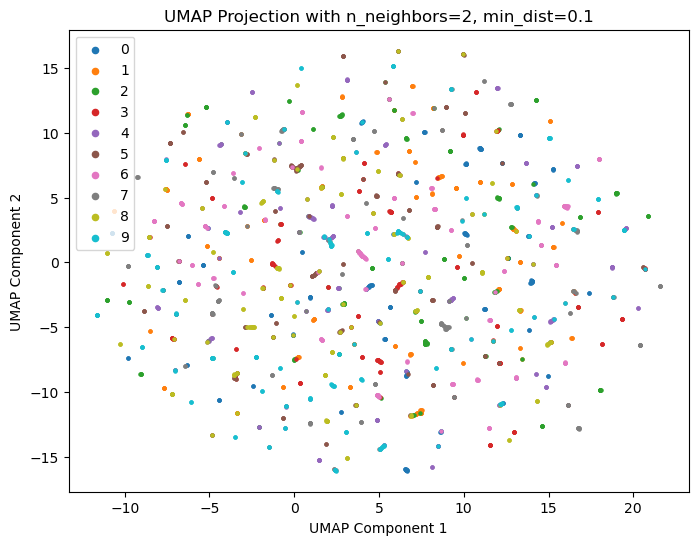

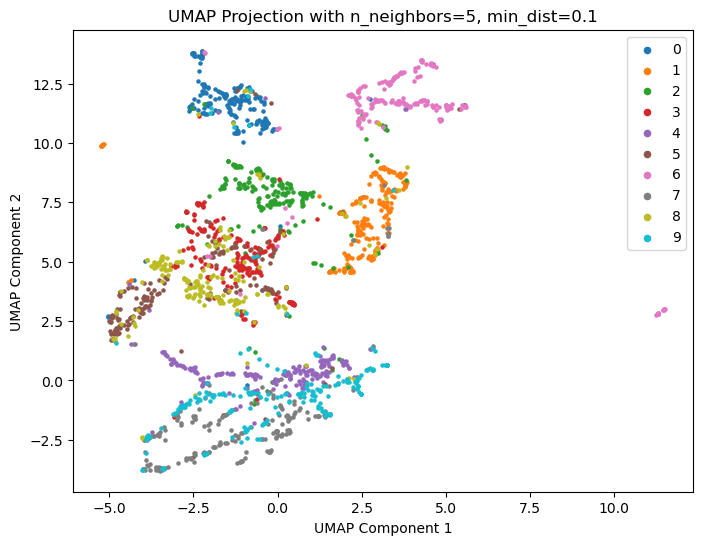

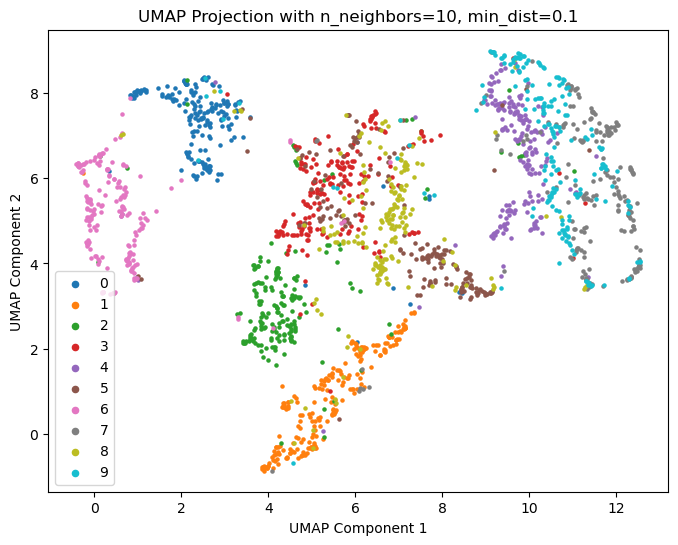

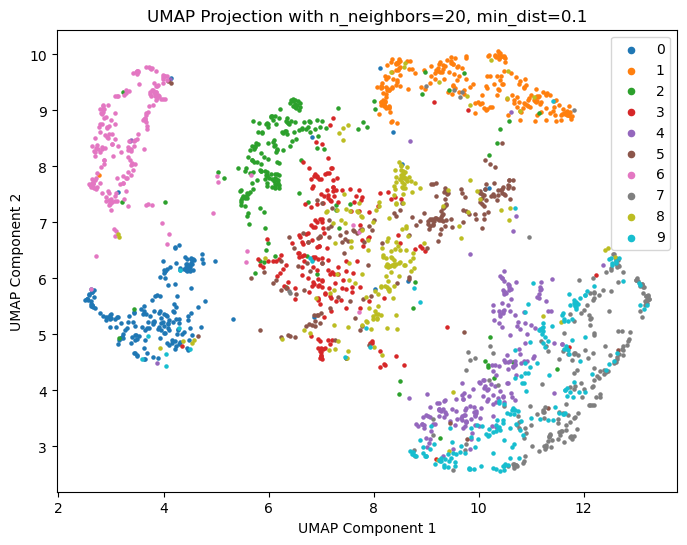

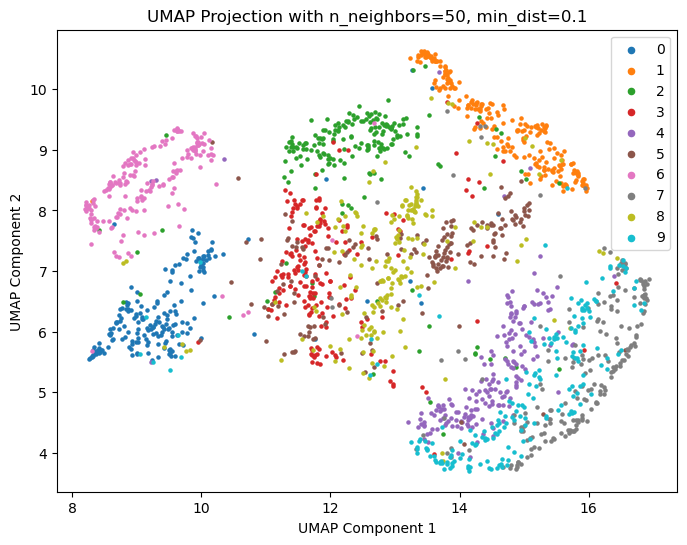

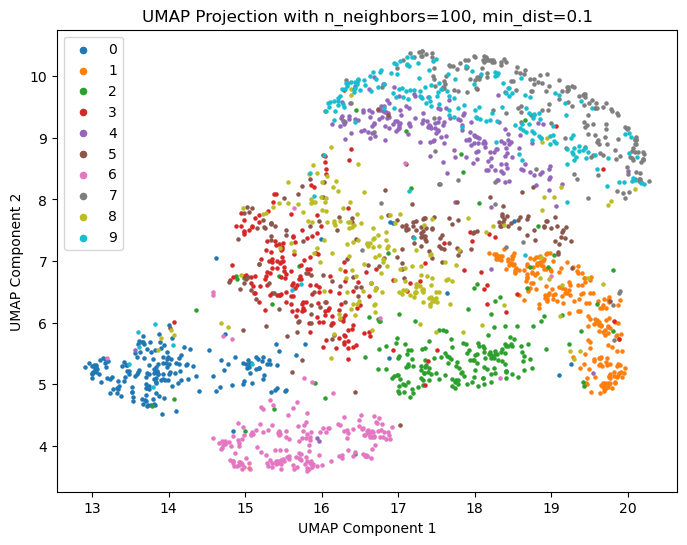

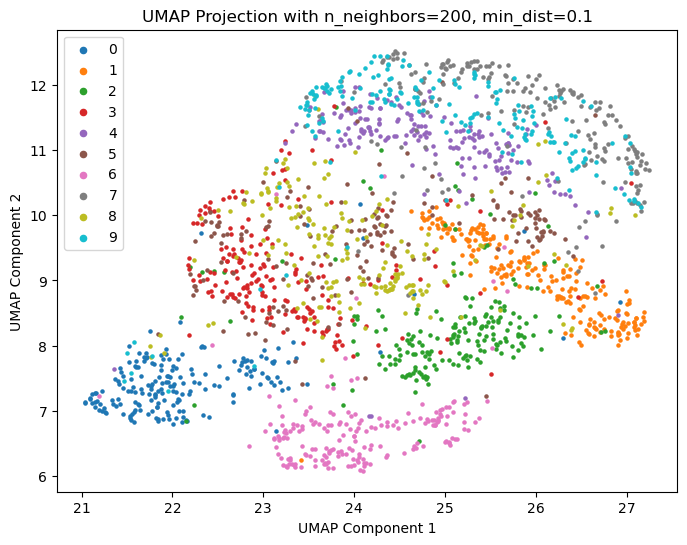

In [6]:
min_dist = 0.1
for n in (2, 5, 10, 20, 50, 100, 200):
    plot_umap(n, min_dist)

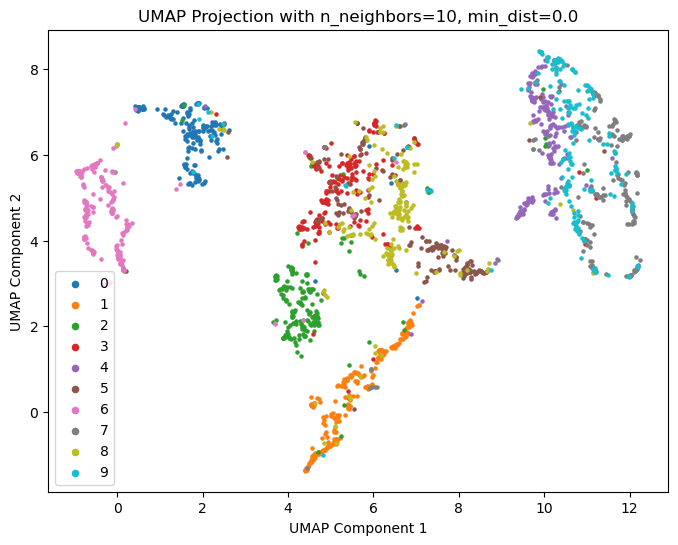

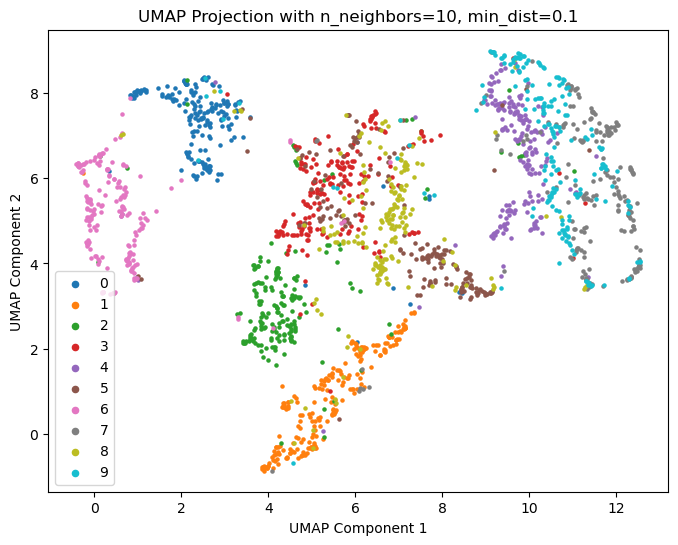

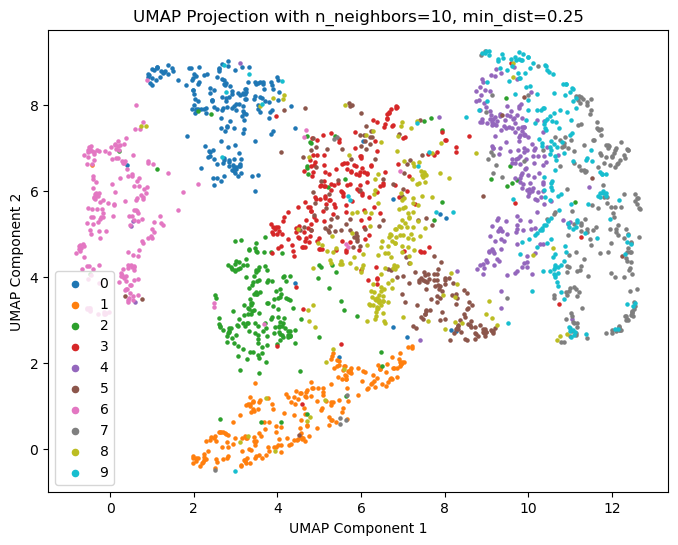

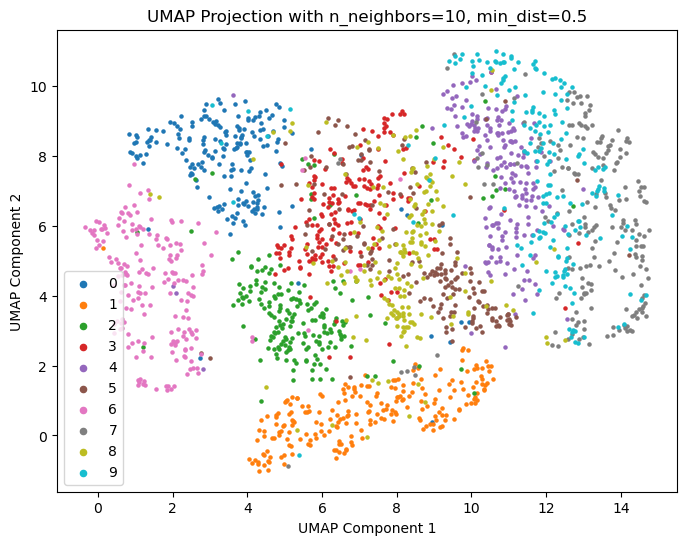

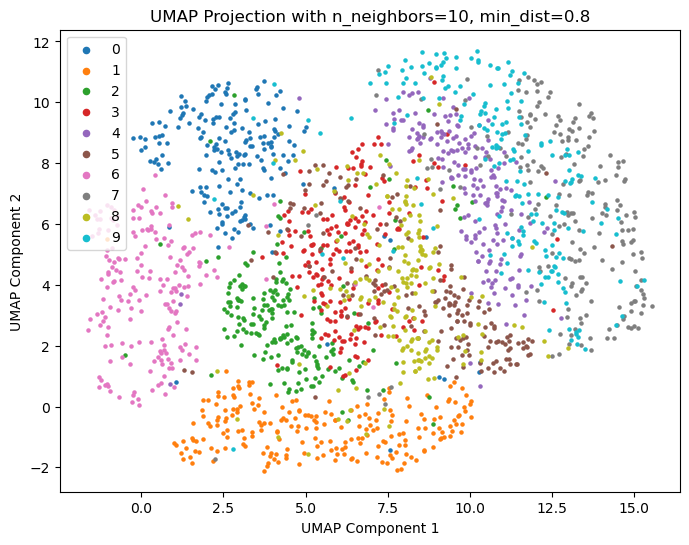

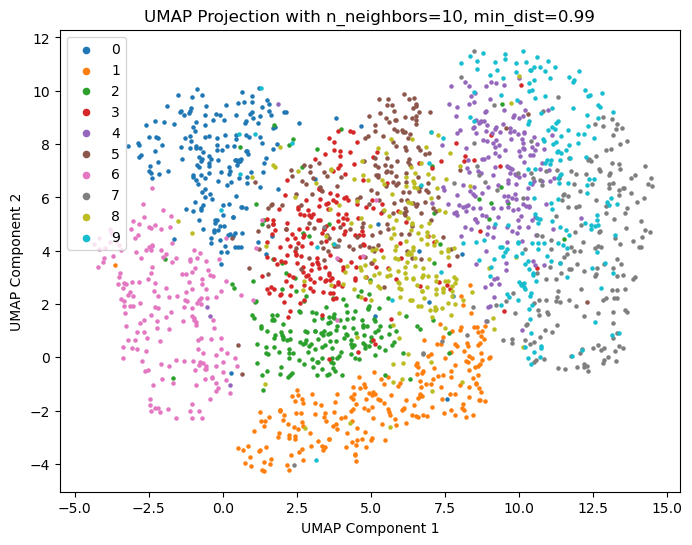

In [7]:
n_neighbors = 10
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    plot_umap(n_neighbors, d)